Prepared by Konrad Staniszewski


Based on torch documentation and torch beginner tutorials

In [1]:
import torch
import numpy as np

# Creation and operations

## Tensor creation
* **`torch.tensor(data, dtype=torch.float32|torch.cuda.FloatTensor|torch.uint8..., device=torch.device('cpu')|torch.device('cuda'), requires_grad=False)`** - **copies storage**
https://pytorch.org/docs/stable/tensors.html
* `torch.from_numpy(np_array)` - **same storage**
https://pytorch.org/docs/stable/generated/torch.from_numpy.html
* `tensor.numpy()` - **same storage**
https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html

* **`torch.ones(*shape, dtype=..., requires_grad=False)`** - https://pytorch.org/docs/stable/generated/torch.ones.html
* **`torch.rand(*shape, dtype=..., requires_grad=False)`** - uniform $[0;1)$ https://pytorch.org/docs/stable/generated/torch.rand.html
* `torch.randn(*shape, dtype=..., requires_grad=False)` - normal with mean $0$ and variance $1$ https://pytorch.org/docs/stable/generated/torch.randn.html

* `torch.ones_like(input)` -- https://pytorch.org/docs/stable/generated/torch.ones_like.html
* `torch.rand_like(input)` -- https://pytorch.org/docs/stable/generated/torch.rand_like.html
* `torch.randn_like(input)` -- https://pytorch.org/docs/stable/generated/torch.randn_like.html

* `tensor.to(torch.device('cuda'))` -- https://pytorch.org/docs/stable/generated/torch.Tensor.to.html

### Basic creation
* `torch.tensor(data, dtype=torch.float32|torch.cuda.FloatTensor|torch.uint8..., device=torch.device('cpu')|torch.device('cuda'))` - **copies storage**
https://pytorch.org/docs/stable/tensors.html
* `torch.from_numpy(np_array)` - **same storage**
https://pytorch.org/docs/stable/generated/torch.from_numpy.html
* `tensor.numpy()` - **same storage**
https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html

#### `torch.tensor(data, dtype=...)` - copies!

In [ ]:
data = [[1, 2], [3, 4], [5, 6]]
data2 = [[1., 2.], [3., 4.], [5., 6.]]
data3 = np.array([[1., 2.], [3., 4.], [5., 6.]])
x_i = torch.tensor(data)
x_f = torch.tensor(data, dtype=torch.float32)
x_f2 = torch.tensor(data2)
x_f3 = torch.tensor(data3)

print(f'x_i: {x_i.dtype} {x_i.shape} {x_i}')
print(f'x_f: {x_f.dtype} {x_f.shape} {x_f}')
print(f'x_f2: {x_f2.dtype} {x_f2.shape} {x_f2}')
print(f'x_f3: {x_f3.dtype} {x_f3.shape} {x_f3}')

x_i: torch.int64 torch.Size([3, 2]) tensor([[1, 2],
        [3, 4],
        [5, 6]])
x_f: torch.float32 torch.Size([3, 2]) tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
x_f2: torch.float32 torch.Size([3, 2]) tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
x_f3: torch.float64 torch.Size([3, 2]) tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float64)


`torch.tensor()` **always copies data**. If you have a Tensor data and just want to change its requires_grad flag, use `requires_grad_()` or `detach()` to avoid a copy. If you have a numpy array and want to avoid a copy, use `torch.as_tensor()`.
source: https://pytorch.org/docs/stable/tensors.html

In [ ]:
data = np.array([[1., 2.], [3., 4.], [5., 6.]])
x = torch.tensor(data)
y = torch.tensor(x)

data[0, 0] = -1
x[0,1] = -2
y[1][0] = -3

print(f'data: {data}')
print(f'x: {x}')
print(f'y: {y}')

data: [[-1.  2.]
 [ 3.  4.]
 [ 5.  6.]]
x: tensor([[ 1., -2.],
        [ 3.,  4.],
        [ 5.,  6.]], dtype=torch.float64)
y: tensor([[ 1.,  2.],
        [-3.,  4.],
        [ 5.,  6.]], dtype=torch.float64)


/tmp/ipykernel_8609/401926324.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(x)


#### `torch.from_numpy(np_array)` - same storage!

In [ ]:
data = np.array([[1., 2.], [3., 4.], [5., 6.]])
x = torch.from_numpy(data)

data[0][0] = -1
x[0][1] = -2

print(f'data: {data}')
print(f'x: {x}')

data: [[-1. -2.]
 [ 3.  4.]
 [ 5.  6.]]
x: tensor([[-1., -2.],
        [ 3.,  4.],
        [ 5.,  6.]], dtype=torch.float64)


#### `tensor.numpy()` - same storage!

In [ ]:
t = torch.tensor([[1., 2.], [3., 4.], [5., 6.]])
n = t.numpy()
t[0,0] = -1
n[0,1] = -2
print(f't: {t}')
print(f'n: {n}')

t: tensor([[-1., -2.],
        [ 3.,  4.],
        [ 5.,  6.]])
n: [[-1. -2.]
 [ 3.  4.]
 [ 5.  6.]]


### More creation methods
#### Direct specification
* `torch.ones(*shape, dtype=...)` - https://pytorch.org/docs/stable/generated/torch.ones.html
* `torch.rand(*shape, dtype=...)` - uniform $[0;1)$ https://pytorch.org/docs/stable/generated/torch.rand.html
* `torch.randn(*shape, dtype=...)` - normal with mean $0$ and variance $1$ https://pytorch.org/docs/stable/generated/torch.randn.html


#### Of the same shape, dtype, device and layout as input
* `torch.ones_like(input)` -- https://pytorch.org/docs/stable/generated/torch.ones_like.html
* `torch.rand_like(input)` -- https://pytorch.org/docs/stable/generated/torch.rand_like.html
* `torch.randn_like(input)` -- https://pytorch.org/docs/stable/generated/torch.randn_like.html

In [ ]:
#torch.set_default_tensor_type(torch.FloatTensor|torch.cuda.FloatTensor) # initial default for floating point is torch.float32
ones = torch.ones(3, 2)
rand = torch.rand(4, 3, 2, dtype=torch.float64)
randn = torch.randn(4, 3, 2, dtype=torch.float16)

# copies shape, dtype, device and layout (The torch.layout class is in beta and subject to change.)
ones_like_rand = torch.ones_like(rand)
rand_like_ones = torch.rand_like(ones)

print(f'ones: {ones.device} {ones.dtype} {ones}')
print(f'rand: {rand.device} {rand.dtype} {rand}')
print(f'randn: {randn.device} {randn.dtype} {randn}')
print(f'ones_like_rand: {ones_like_rand.device} {ones_like_rand.dtype} {ones_like_rand}')
print(f'rand_like_ones: {rand_like_ones.device} {rand_like_ones.dtype} {rand_like_ones}')

ones: cpu torch.float32 tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
rand: cpu torch.float64 tensor([[[0.6459, 0.1407],
         [0.5571, 0.1741],
         [0.6656, 0.3680]],

        [[0.5351, 0.4693],
         [0.2668, 0.9146],
         [0.8657, 0.4302]],

        [[0.5420, 0.4839],
         [0.7266, 0.9356],
         [0.1940, 0.6944]],

        [[0.3467, 0.8654],
         [0.4570, 0.7729],
         [0.0491, 0.1952]]], dtype=torch.float64)
randn: cpu torch.float16 tensor([[[ 1.4297,  0.9082],
         [-0.1298, -2.9141],
         [-0.0546, -0.6421]],

        [[ 0.0143, -0.9907],
         [ 1.4756,  0.8491],
         [ 0.5674,  0.2524]],

        [[ 0.2908,  0.1351],
         [-1.1650,  1.4678],
         [-0.4294, -0.3555]],

        [[-0.2998,  0.8916],
         [ 0.8140,  0.7031],
         [-0.6411, -0.5029]]], dtype=torch.float16)
ones_like_rand: cpu torch.float64 tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1

### Putting on device
* `tensor_gpu = tensor.to(torch.device('cuda'))` - copies if on wrong device https://pytorch.org/docs/stable/generated/torch.Tensor.to.html


In [ ]:
t_cpu = torch.tensor([1., 2., 3.], device=torch.device('cpu'))
t_cpu2 = t_cpu.to(torch.device('cpu')) # NOT a copy because device is already cpu
t_cpu[0] = -1
t_cpu2[1] = -2
print(f't_cpu: {t_cpu.device} {t_cpu}')
print(f't_cpu2: {t_cpu2.device} {t_cpu2}')

if torch.cuda.is_available():
    print('Ok cuda is here')
    gpu = torch.device('cuda')
    t_gpu = t_cpu.to(gpu) # COPY is done here as cpu /= gpu
    t_gpu[2] = -3
    print(f't_gpu: {t_gpu.device} {t_gpu}')
    print(f't_cpu: {t_cpu.device} {t_cpu}')

t_cpu: cpu tensor([-1., -2.,  3.])
t_cpu2: cpu tensor([-1., -2.,  3.])
Ok cuda is here
t_gpu: cuda:0 tensor([-1., -2., -3.], device='cuda:0')
t_cpu: cpu tensor([-1., -2.,  3.])


## Tensor operations
* numpy like slicing
* `torch.cat([tensor, tensor, tensor], dim=0)` - concats tensors that have the same shape (except the dim) https://pytorch.org/docs/stable/generated/torch.cat.html
* `torch.split(tensor, split_data, dim=0)` - split data is either a number of portions (last portion will be smaller if the size across dim is not divisible by number of portions) or a list with portion sizes https://pytorch.org/docs/stable/generated/torch.split.html#torch.split
* `torch.stack([tensor, tensor, tensor], dim=0)` - stack tensors of the same shape along a new dimension (dim $\in [0;\text{num\_dims}]$) https://pytorch.org/docs/stable/generated/torch.stack.html
* `tensor * tensor` - pointwise (also +,-,/)
* `tensor @ tensor` - matrix mul
* `torch.transpose(input, dim0, dim1)` - returns with dims swapped (if not sparse then **same storage**) https://pytorch.org/docs/stable/generated/torch.transpose.html

### Numpy like slicing

In [ ]:
t = torch.zeros(10, 10)
t[:,5] = 3.
t[2, :] += 2.
t *= 7.
print(t)
print()

t = torch.zeros(10, 10)
t[[1, 5], :] = 42.
t[:, [8, 9]] += 24.
print(t)
print()


t = torch.zeros(10, 10)
t[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4]] = 42.
print(t)
print()


t = torch.zeros(2, 5)
t[[0, 1, 0, 1, 0], [0, 1, 2, 3, 4]] = 42.
print(t)
print()

t = torch.zeros(5, 5, 5)
t[[0, 3], :, [1, 4]] = 42
print(t)

tensor([[ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.],
        [14., 14., 14., 14., 14., 35., 14., 14., 14., 14.],
        [ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.]])

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24., 24.],
        [42., 42., 42., 42., 42., 42., 42., 42., 66., 66.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24., 24.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24., 24.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24., 24.],
        [42., 42., 42., 42., 42., 42., 42., 42., 66., 66.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,

### Concat split and stack
* `torch.cat([tensor, tensor, tensor], dim=0)` - concats tensors that have the same shape (except the dim) or are empty https://pytorch.org/docs/stable/generated/torch.cat.html
* `torch.split(tensor, split_data, dim=0)` - split data is either a number of portions (last portion will be smaller if the size across dim is not divisible by number of portions) or a list with portion sizes https://pytorch.org/docs/stable/generated/torch.split.html#torch.split
* `torch.stack([tensor, tensor, tensor], dim=0)` - stack tensors of the same shape along a new dimension (dim $\in [0;\text{num\_dims}]$) https://pytorch.org/docs/stable/generated/torch.stack.html

In [ ]:
t = torch.tensor([[1, 2], [6, 7], [11, 12]])
t2 = torch.tensor([[3], [8], [13]])
t3 = torch.tensor([[4, 5], [9, 10], [14, 15]])

print(f't: {t.shape} {t}')
print(f't2: {t2.shape} {t2}')
print(f't3: {t3.shape} {t3}')

tc = torch.cat([t, t2, t3], dim=1)
t[0][0] = -1
t2[0, 0] = -3
t3[0, 0] = -4
print(f'tc: {tc.shape} {tc}')

tensors = torch.split(tc, [2, 1, 2], dim=1)
tc[0, 0] = -10 # BEWARE
print(f'tc_split: {tensors}')

print('----------------')

t4 = torch.tensor([1, 2])
t5 = torch.tensor([3, 4])
t6 = torch.tensor([5, 6])

print(f't4: {t4.shape} {t4}')
print(f't5: {t5.shape} {t5}')
print(f't6: {t6.shape} {t6}')

ts = torch.stack([t4, t5, t6], dim=0)
print(f'ts: {ts.shape} {ts}')

t: torch.Size([3, 2]) tensor([[ 1,  2],
        [ 6,  7],
        [11, 12]])
t2: torch.Size([3, 1]) tensor([[ 3],
        [ 8],
        [13]])
t3: torch.Size([3, 2]) tensor([[ 4,  5],
        [ 9, 10],
        [14, 15]])
tc: torch.Size([3, 5]) tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]])
tc_split: (tensor([[-10,   2],
        [  6,   7],
        [ 11,  12]]), tensor([[ 3],
        [ 8],
        [13]]), tensor([[ 4,  5],
        [ 9, 10],
        [14, 15]]))
----------------
t4: torch.Size([2]) tensor([1, 2])
t5: torch.Size([2]) tensor([3, 4])
t6: torch.Size([2]) tensor([5, 6])
ts: torch.Size([3, 2]) tensor([[1, 2],
        [3, 4],
        [5, 6]])


### Arithmetic and transpose
* `tensor * tensor` - pointwise (also +, -, /)
* `tensor @ tensor` - matrix mul
* `torch.transpose(input, dim0, dim1)` - returns with dims swapped (if not sparse then **same storage**) https://pytorch.org/docs/stable/generated/torch.transpose.html

In [ ]:
t = torch.tensor([[1., 2.], [3., 4.], [5., 6.]])
power = t**3
pointwise_mul = t * t
mat_mul = t @ t.T # transpose

print(f't: {t.shape} {t}')
print(f'power: {power}')
print(f'pointwise_mul: {pointwise_mul}')
print(f'mat_mul: {mat_mul}')

t: torch.Size([3, 2]) tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
power: tensor([[  1.,   8.],
        [ 27.,  64.],
        [125., 216.]])
pointwise_mul: tensor([[ 1.,  4.],
        [ 9., 16.],
        [25., 36.]])
mat_mul: tensor([[ 5., 11., 17.],
        [11., 25., 39.],
        [17., 39., 61.]])


# Autograd

## Basics
* `torch.tensor(data, requires_grad=False)` - https://pytorch.org/docs/stable/tensors.html
* `tensor.requires_grad = False` - to disable grad (for leaves)
* `nograd_tensor = tensor.detach()` - new with disabled grads **but shares memory** https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html
* `tensor.backward(gradient=init_grad)` - bakpropagate gradients, init_grad is a grad with respect to tensor (not required if tensor is a scalar) https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html
* `with torch.no_grad():` - disables gradient calculation (as all requires_grad=False) https://pytorch.org/docs/stable/generated/torch.no_grad.html

In [ ]:
# important we want to track operations on a and b (to calculate gradients)
a = torch.tensor([3., 5.], requires_grad=True)
# a.requires_grad = True
b = torch.tensor([7., 11.], requires_grad=True)


for i in range(4):
    c = 2*b**2
    # c = c.detach() # if we do not want to propagate gradients throughout c

    y = 3*a**4 + c


    y.backward(gradient=torch.tensor([1., 1.]))
    print(f'#Before step {i}:')
    print(f'a: {a}')
    if i == 0:
        print(f'b: {b}')
        print(f'c: {c}')
    print(f'y: {y}')
    print(f'1*dy/da: {a.grad}')
    if i == 0:
        print(f'1*dy/db: {b.grad}')
        print(f'1*dy/dc: {c.grad}')

    # we do not track grad updates
    with torch.no_grad():
        a -= 0.005*a.grad
        a.grad = None
        b.grad = None

#Before step 0:
a: tensor([3., 5.], requires_grad=True)
b: tensor([ 7., 11.], requires_grad=True)
c: tensor([ 98., 242.], grad_fn=<MulBackward0>)
y: tensor([ 341., 2117.], grad_fn=<AddBackward0>)
1*dy/da: tensor([ 324., 1500.])
1*dy/db: tensor([28., 44.])
1*dy/dc: None
#Before step 1:
a: tensor([ 1.3800, -2.5000], requires_grad=True)
y: tensor([108.8802, 359.1875], grad_fn=<AddBackward0>)
1*dy/da: tensor([  31.5369, -187.5000])
#Before step 2:
a: tensor([ 1.2223, -1.5625], requires_grad=True)
y: tensor([104.6966, 259.8814], grad_fn=<AddBackward0>)
1*dy/da: tensor([ 21.9145, -45.7764])
#Before step 3:
a: tensor([ 1.1127, -1.3336], requires_grad=True)
y: tensor([102.5994, 251.4896], grad_fn=<AddBackward0>)
1*dy/da: tensor([ 16.5336, -28.4627])


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


DAGs are dynamic in PyTorch An important thing to note is that **the graph is recreated from scratch; after each .backward() call**, autograd starts populating a new graph. This is exactly what allows you to use control flow statements in your model; you can change the shape, size and operations at every iteration if needed.
source: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

## Network module
* `layer = torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)` - dense layer, expects a tensor $x$ with last dim of size `in_features` outputs $y = xA^T + b$ with last dim of size `out_features` https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
    + `layer.weight` matrix of shape `(out_features,in_features)` of learnable weights
    + `layer.bias` bias of shape `(out_features,)` of learnable biases
* `torch.nn.functional.relu(data)` max(0, data) https://pytorch.org/docs/stable/generated/torch.nn.functional.relu.html*
* `torch.nn.functional.softmax(data, dim=-1)` - computes $res[..., i] = \frac{exp({data[..., i]})}{\sum_{i}{exp({data[..., i]}})}$ https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html
* `torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, bias=True, padding_mode='zeros', device=None, dtype=None)`
takes input of shape `(batch, in_channels, height, width)`
and outputs `(batch, out_channels, height, width)` https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
*
`torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, return_indices=False, ceil_mode=False)` https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
* `torch.flatten(data, start_dim=0, end_dim=-1)` - https://pytorch.org/docs/stable/generated/torch.flatten.html
* `module.parameters()` - get parameters
* `torch.nn.Parameter(tensor)` https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html
* `torch.nn.ModuleList(module_list)` https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html
* `torch.nn.Sequential(module_list)` https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

**DO NOT USE PLAIN PYTHON LISTS AND PLAIN TENSORS FOR TRAINABLE ELEMENTS WHEN CREATING A MODULE. USE MODULES, PARAMETERS, MODULELISTS AND SEQUENTIALS INSTEAD**

In [ ]:
class SimpleModule(torch.nn.Module):
    def __init__(self):
        super().__init__()
        scale = 1. / (3.*32*32)
        self.mat = torch.nn.Parameter(torch.rand(10, 3*32*32) * scale) # Parameter! do not use plain tensor!!!
    def forward(self, x):
        x = torch.flatten(x, -3) # flatten last three
        v = x @ self.mat.T
        return v

In [ ]:
simple = SimpleModule()
out = simple(torch.ones(1, 3, 32, 32))  # batch size 1
print(torch.nn.functional.softmax(out, dim=-1))

tensor([[0.1001, 0.1001, 0.1001, 0.1000, 0.1000, 0.0994, 0.1002, 0.1000, 0.1001,
         0.1001]], grad_fn=<SoftmaxBackward0>)


In [ ]:
class MyMLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.dense1 = torch.nn.Linear(3*32*32, 256)
        self.dense2 = torch.nn.Linear(256, 128)
        self.classify = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, -3) # flatten last three
        d1 = torch.nn.functional.relu(self.dense1(x))
        d2 = torch.nn.functional.relu(self.dense2(d1))
        c = self.classify(d2)
        return c

In [ ]:
mlp = MyMLP()
out = mlp(torch.ones(1, 3, 32, 32)) # batch size 1
print(torch.nn.functional.softmax(out, dim=-1))

tensor([[0.0955, 0.1148, 0.1000, 0.1080, 0.0957, 0.0957, 0.0920, 0.0923, 0.0936,
         0.1124]], grad_fn=<SoftmaxBackward0>)


In [ ]:
# based on https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = torch.nn.Conv2d(3, 6, 3, padding=1)
        self.conv2 = torch.nn.Conv2d(6, 16, 3, padding=1)
        self.dense1 = torch.nn.Linear(8*8*16, 120)
        self.dense2 = torch.nn.Linear(120, 84)
        self.classify = torch.nn.Linear(84, 10)

    def forward(self, x):

        c1 = self.pool(torch.nn.functional.relu(self.conv1(x)))
        c2 = self.pool(torch.nn.functional.relu(self.conv2(c1)))

        f = torch.flatten(c2, -3) # flatten last three

        d1 = torch.nn.functional.relu(self.dense1(f))
        d2 = torch.nn.functional.relu(self.dense2(d1))
        c = self.classify(d2)
        return c

In [ ]:
conv = ConvNet()
out = conv(torch.ones(1, 3, 32, 32))
print(torch.nn.functional.softmax(out, dim=-1))

tensor([[0.0962, 0.1055, 0.0927, 0.1130, 0.0985, 0.0924, 0.1114, 0.0992, 0.1002,
         0.0910]], grad_fn=<SoftmaxBackward0>)


### Get dataset
source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [ ]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

batch_size = 64

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)




classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


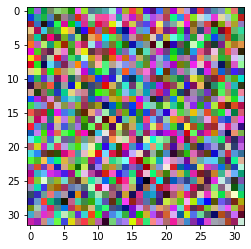

In [ ]:
import matplotlib.pyplot as plt
def print_img(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # color to last dim
    plt.show()

print_img(torch.rand(3, 32, 32))

### Train Module
* https://pytorch.org/docs/stable/optim.html
* https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [ ]:
simple = SimpleModule()
mlp = MyMLP()
conv = ConvNet()

simple_optim = torch.optim.SGD(simple.parameters(), lr=0.01, momentum=0.9)
mlp_optim = torch.optim.SGD(mlp.parameters(), lr=0.01, momentum=0.9)
conv_optim = torch.optim.SGD(conv.parameters(), lr=0.01, momentum=0.9)
loss_f = torch.nn.CrossEntropyLoss()

loss_f = torch.nn.CrossEntropyLoss()

net_names = ['simple', 'mlp', 'conv']
net_list = [simple, mlp, conv]
optim_list = [simple_optim, mlp_optim, conv_optim]

In [ ]:
def train_nets(inputs, labels, netxoptim):
    for net, optim in netxoptim:
        optim.zero_grad()

        out = net(inputs)
        loss = loss_f(out, labels)
        loss.backward()

        optim.step()

def test_nets(testset, namexnet):
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
    for name, net in namexnet:
        acc = 0.0
        data_parts = 0
        for inputs, labels in testloader:
            with torch.no_grad():
                out = torch.argmax(net(inputs), dim=-1)
                acc += (out == labels).sum()
                data_parts += labels.shape[0]
        print(f'Net {name} has {float(acc)/data_parts} accurancy')



for epoch in range(10):
    print(f'Epoch {epoch}:')
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        train_nets(inputs, labels, zip(net_list, optim_list))
        if i % 1000 == 0:
            print(f'testing {i}')
            test_nets(testset, zip(net_names, net_list))

Epoch 0:
testing 0
Net simple has 0.2045 accurancy
Net mlp has 0.1199 accurancy
Net conv has 0.1 accurancy
Epoch 1:
testing 0
Net simple has 0.3553 accurancy
Net mlp has 0.4581 accurancy
Net conv has 0.433 accurancy
Epoch 2:
testing 0
Net simple has 0.3649 accurancy
Net mlp has 0.4879 accurancy
Net conv has 0.5724 accurancy
Epoch 3:
testing 0
Net simple has 0.3581 accurancy
Net mlp has 0.5182 accurancy
Net conv has 0.6017 accurancy
Epoch 4:
testing 0
Net simple has 0.3519 accurancy
Net mlp has 0.5181 accurancy
Net conv has 0.6238 accurancy
Epoch 5:
testing 0
Net simple has 0.3192 accurancy
Net mlp has 0.5195 accurancy
Net conv has 0.6463 accurancy
Epoch 6:
testing 0
Net simple has 0.3521 accurancy
Net mlp has 0.5247 accurancy
Net conv has 0.6419 accurancy
Epoch 7:
testing 0
Net simple has 0.3334 accurancy
Net mlp has 0.5346 accurancy
Net conv has 0.6505 accurancy
Epoch 8:
testing 0
Net simple has 0.3588 accurancy
Net mlp has 0.5389 accurancy
Net conv has 0.6592 accurancy


KeyboardInterrupt: 

In [ ]:
iterator = iter(trainloader)
inputs, labels = iterator.next()

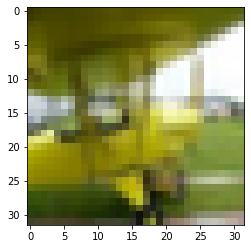

plane
    name  prob
0  plane    80
1    car     0
2   bird     5
3    cat     4
4   deer     1
5    dog     2
6   frog     4
7  horse     0
8   ship     0
9  truck     0


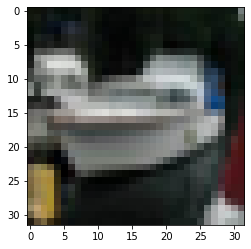

ship
    name  prob
0  plane     1
1    car     1
2   bird     0
3    cat     0
4   deer     0
5    dog     0
6   frog     0
7  horse     0
8   ship    96
9  truck     0


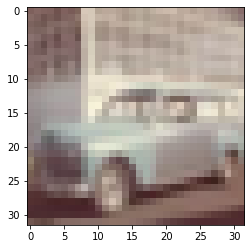

car
    name  prob
0  plane     5
1    car    30
2   bird     1
3    cat     3
4   deer     4
5    dog     2
6   frog     1
7  horse     0
8   ship     1
9  truck    47


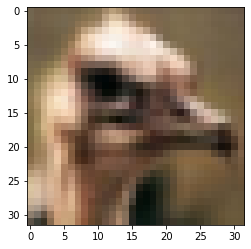

bird
    name  prob
0  plane     0
1    car     0
2   bird    82
3    cat     3
4   deer     0
5    dog    10
6   frog     0
7  horse     0
8   ship     0
9  truck     0


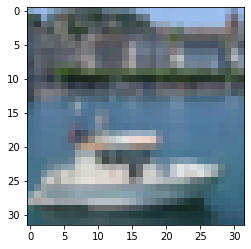

ship
    name  prob
0  plane     1
1    car     1
2   bird     0
3    cat     0
4   deer     0
5    dog     0
6   frog     0
7  horse     0
8   ship    96
9  truck     0


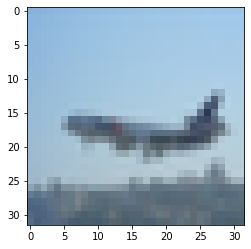

plane
    name  prob
0  plane    77
1    car     0
2   bird     0
3    cat     0
4   deer     0
5    dog     0
6   frog     0
7  horse     0
8   ship    22
9  truck     0


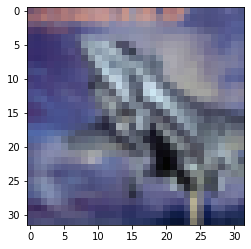

plane
    name  prob
0  plane    14
1    car     0
2   bird    78
3    cat     0
4   deer     0
5    dog     1
6   frog     2
7  horse     0
8   ship     2
9  truck     0


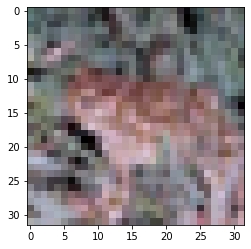

frog
    name  prob
0  plane     0
1    car     0
2   bird     6
3    cat     6
4   deer     8
5    dog     1
6   frog    76
7  horse     0
8   ship     0
9  truck     0


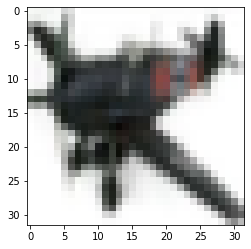

plane
    name  prob
0  plane    99
1    car     0
2   bird     0
3    cat     0
4   deer     0
5    dog     0
6   frog     0
7  horse     0
8   ship     0
9  truck     0


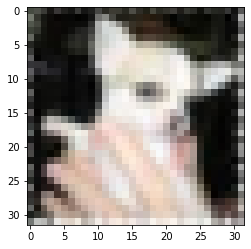

dog
    name  prob
0  plane     0
1    car     0
2   bird     0
3    cat    28
4   deer     0
5    dog    71
6   frog     0
7  horse     0
8   ship     0
9  truck     0


In [ ]:
import pandas as pd
def get_class_probs(net, input_img):
    with torch.no_grad():
        probs = torch.nn.functional.softmax(net(input_img), dim=-1)
        res = []
        return pd.DataFrame(data={"name": classes, "prob": (probs*100).to(torch.int).numpy()})


for i in range(10, 20):
    print_img(inputs[i]/2 + 0.5)
    print(classes[labels[i]])
    print(get_class_probs(conv, inputs[i]))

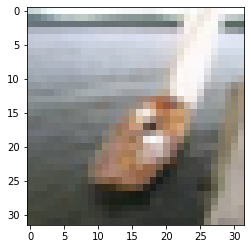

,name,prob
0,plane,0
1,car,1
2,bird,0
3,cat,0
4,deer,0
5,dog,0
6,frog,0
7,horse,0
8,ship,74
9,truck,23


In [ ]:
image = inputs[42]
label = labels[42]
net = conv
print_img(image/2 + 0.5)

get_class_probs(net, image)

/home/skonrad/.local/lib/python3.10/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


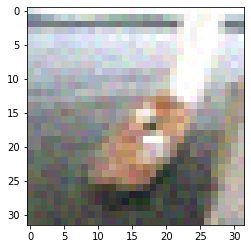

,name,prob
0,plane,0
1,car,1
2,bird,0
3,cat,0
4,deer,0
5,dog,0
6,frog,0
7,horse,0
8,ship,66
9,truck,29


In [ ]:
def noise_apply(img, noise):
    return torch.maximum(torch.minimum(img + (-0.5 + torch.nn.functional.sigmoid(noise)), torch.max(img)), torch.min(img))

noise = torch.rand(3, 32, 32, requires_grad=True)
mod_img = noise_apply(image, noise.detach())
print_img(mod_img/2 + 0.5)


get_class_probs(net, mod_img)

In [ ]:
noise = torch.rand(3, 32, 32, requires_grad=True)
for i in range(1000):
    net.zero_grad()
    mod_img = noise_apply(image, noise)
    out = net(mod_img)
    loss = loss_f(out, label) - 0.1*torch.norm(noise)
    loss.backward()

    with torch.no_grad():
        noise += 0.1*noise.grad
        noise.grad = None

/home/skonrad/.local/lib/python3.10/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


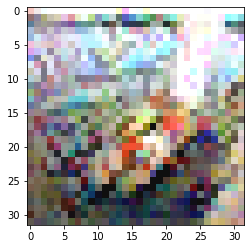

,name,prob
0,plane,0
1,car,0
2,bird,0
3,cat,0
4,deer,0
5,dog,0
6,frog,0
7,horse,0
8,ship,0
9,truck,100


In [ ]:
#mod_img = image.clone()
#mod_img[:, [0,-1], :] += noise.detach()
mod_img = noise_apply(image, noise.detach())
print_img(mod_img/2 + 0.5)
get_class_probs(net, mod_img)